In [516]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


In [517]:
base = pd.read_csv('train.csv')
base

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [518]:
def verifyNull():
  null_data = base.isnull().sum()
  print("Total: ", len(null_data))
  print("Total de colunas com info nulls: ", len(null_data[null_data>0]))
  return null_data[null_data>0]
verifyNull()

Total:  81
Total de colunas com info nulls:  19


LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [519]:
base['LotFrontage'] = base['LotFrontage'].fillna(base['LotFrontage'].mean)
base['Alley'] = base['Alley'].fillna('Grvl')
base['MasVnrType'] = base['MasVnrType'].fillna('BrkFace')
base['MasVnrArea'] = base['MasVnrArea'].fillna(0)
base['BsmtQual'] = base['BsmtQual'].fillna('TA')
base['BsmtCond'] = base['BsmtCond'].fillna('TA')
base['BsmtExposure'] = base['BsmtExposure'].fillna('No')
base['BsmtFinType1'] = base['BsmtFinType1'].fillna(base['BsmtFinType1'].mode()[0])
base['BsmtFinType2'] = base['BsmtFinType2'].fillna(base['BsmtFinType2'].mode()[0])
base['Electrical'] = base['Electrical'].fillna(base['Electrical'].mode()[0])
base['FireplaceQu'] = base['FireplaceQu'].fillna(base['FireplaceQu'].mode()[0])
base['GarageType'] = base['GarageType'].fillna(base['GarageType'].mode()[0])
base['GarageYrBlt'] = base['GarageYrBlt'].fillna(base['GarageYrBlt'].mode()[0])
base['GarageFinish'] = base['GarageFinish'].fillna(base['GarageFinish'].mode()[0])
base['GarageQual'] = base['GarageQual'].fillna(base['GarageQual'].mode()[0])
base['GarageCond'] = base['GarageCond'].fillna(base['GarageCond'].mode()[0])
base['PoolQC'] = base['PoolQC'].fillna(base['PoolQC'].mode()[0])
base['Fence'] = base['Fence'].fillna(base['Fence'].mode()[0])
base['MiscFeature'] = base['MiscFeature'].fillna(base['MiscFeature'].mode()[0])

In [520]:
verifyNull()

Total:  81
Total de colunas com info nulls:  0


Series([], dtype: int64)

In [521]:
prevision = base.iloc[:, 0:len(base.columns) - 1].values
classe = base.iloc[:, len(base.columns) - 1].values.astype(float)


In [522]:
def encode_categorical_columns(data):
    labelEncoder = LabelEncoder()
    n_cols = data.shape[1]
    
    for col in range(n_cols):
        if isinstance(data[:, col], str):  # Se o dado for categórico
            data[:, col] = labelEncoder.fit_transform(data[:, col])
        else:
            # Convert to float if not already numeric
            data[:, col] = pd.to_numeric(data[:, col], errors='coerce')

    # Convert data to float after encoding
    data = data.astype(float)
    return data

prevision = encode_categorical_columns(prevision)

prevision

array([[1.000e+00, 6.000e+01,       nan, ..., 2.008e+03,       nan,
              nan],
       [2.000e+00, 2.000e+01,       nan, ..., 2.007e+03,       nan,
              nan],
       [3.000e+00, 6.000e+01,       nan, ..., 2.008e+03,       nan,
              nan],
       ...,
       [1.458e+03, 7.000e+01,       nan, ..., 2.010e+03,       nan,
              nan],
       [1.459e+03, 2.000e+01,       nan, ..., 2.010e+03,       nan,
              nan],
       [1.460e+03, 2.000e+01,       nan, ..., 2.008e+03,       nan,
              nan]])

In [523]:
verifyNull()

Total:  81
Total de colunas com info nulls:  0


Series([], dtype: int64)

In [524]:
x_train, x_test, y_train, y_test = train_test_split(prevision, classe, random_state=0, test_size=0.3)

In [525]:
scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)

C:\Users\josia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\extmath.py:1108: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
C:\Users\josia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\extmath.py:1113: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
C:\Users\josia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\extmath.py:1133: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [526]:
np.isnan(x_train).any()
np.isnan(x_test).any()

True

In [527]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean') 
x_train = imputer.fit_transform(x_train)
x_test = imputer.fit_transform(x_test)
x_train

C:\Users\josia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\impute\_base.py:565: UserWarning: Skipping features without any observed values: [ 2  5  6  7  8  9 10 11 12 13 14 15 16 21 22 23 24 25 27 28 29 30 31 32
 33 35 39 40 41 42 53 55 57 58 60 63 64 65 72 73 74 78 79]. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
C:\Users\josia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\impute\_base.py:565: UserWarning: Skipping features without any observed values: [ 2  5  6  7  8  9 10 11 12 13 14 15 16 21 22 23 24 25 27 28 29 30 31 32
 33 35 39 40 41 42 53 55 57 58 60 63 64 65 72 73 74 78 79]. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


array([[-1.58071942e+00,  8.03400218e-02,  1.91123628e-16, ...,
        -9.51679237e-02, -1.58780093e+00,  8.65414057e-01],
       [-1.14126110e-01,  1.50416954e+00,  1.91123628e-16, ...,
        -9.51679237e-02,  1.73520088e+00,  1.19669397e-01],
       [ 5.45603568e-01, -8.68879658e-01, -8.52786688e-01, ...,
        -9.51679237e-02, -1.58780093e+00,  1.61115872e+00],
       ...,
       [ 1.15312442e+00,  7.92254782e-01, -7.23494565e-02, ...,
        -9.51679237e-02, -8.49356085e-01,  1.61115872e+00],
       [-4.06020896e-01,  1.50416954e+00,  1.91123628e-16, ...,
        -9.51679237e-02,  1.36597846e+00, -1.37181992e+00],
       [-1.09379854e-01,  8.03400218e-02, -5.05925696e-01, ...,
        -9.51679237e-02, -1.10911237e-01,  1.61115872e+00]])

In [528]:

modelo = LinearRegression()
modelo = modelo.fit(x_train, y_train)
modelo

LinearRegression()

In [529]:
modelo.intercept_ + modelo.coef_ * x_test

array([[180526.59818343, 185465.14182995, 180744.18385059, ...,
        180621.39264054, 181804.69194118, 181076.84404158],
       [180514.63648751, 181470.6207509 , 181746.8580688 , ...,
        180621.39264054, 179964.31318891, 181656.8661312 ],
       [180504.56348042, 181470.6207509 , 180744.18385059, ...,
        180621.39264054, 180332.38893936, 179916.79986234],
       ...,
       [180565.94586738, 185465.14182995, 183234.69723131, ...,
        180621.39264054, 179964.31318891, 180496.82195196],
       [180762.99906859, 185465.14182995, 180259.0189063 , ...,
        180621.39264054, 181804.69194118, 179916.79986234],
       [180642.75254645, 185465.14182995, 184350.57660319, ...,
        180621.39264054, 181804.69194118, 179336.77777272]])

In [530]:
modelo.coef_
#Onde a linha irá tocar
modelo.intercept_

180589.8979037199

In [531]:
prevision = modelo.predict(x_test)
prevision

array([253060.5609635 , 155089.22132939, 103940.97983669, 229713.16223099,
       102635.32632136,  97769.38162544, 247678.42715456, 137690.90144658,
       504827.10601419, 148397.92251854, 183546.83148473, 154819.10976517,
       249484.58749989, 110272.55034894, 136043.44893375, 141959.10973771,
       234612.73192002, 101120.26580841, 127968.07943531, 168478.26672357,
       125099.7277883 , 158014.86007552, 105328.0711944 , 159687.85234235,
       197743.46409853, 197458.95425462, 157404.49986665,  46824.18665791,
       314790.47908499, 119821.07971147, 161770.18519315, 218013.83462371,
       153614.95460306, 287342.9045885 , 296634.80627492, 197017.92609853,
       270637.18173651, 111145.33392099, 222365.95297333, 330228.68048854,
       214319.30958007, 115274.88127269, 190277.19746124, 288372.80321349,
       335670.80420348, 131399.21158799, 122299.11255347, 117970.02751776,
       184234.85613985,  82720.62364782, 380361.92224775, 148942.73662889,
       204124.19933238,  

In [532]:

mse = mean_squared_error(y_test, prevision)
r2 = r2_score(y_test, prevision)
print(r2)
print(mse)


0.7208402588856493
1895213093.0867949


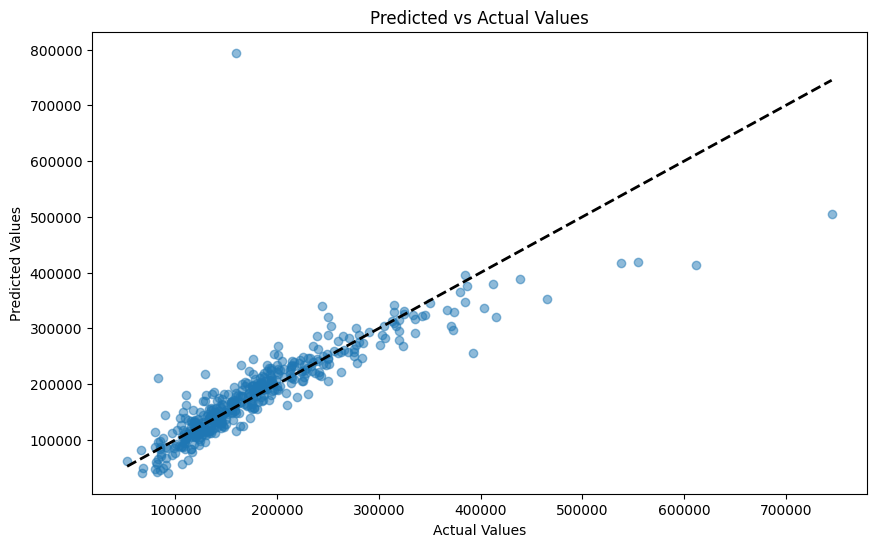

In [541]:

# Scatter Plot: Predicted vs Actual Values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, prevision, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values')
plt.show()

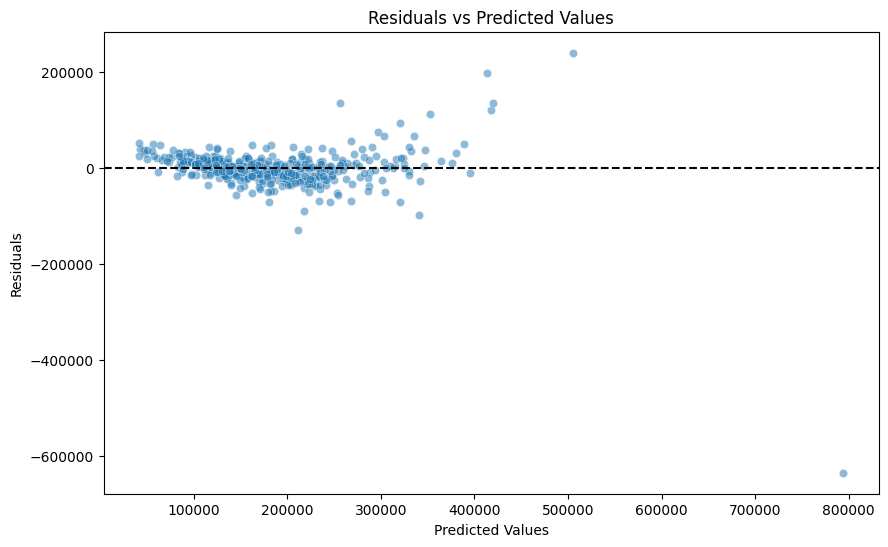

In [534]:
# Residual Plot
residuals = y_test - prevision

plt.figure(figsize=(10, 6))
sns.scatterplot(x=prevision, y=residuals, alpha=0.5)
plt.axhline(y=0, color='k', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()

In [535]:
testData = pd.read_csv('test.csv')
testData

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [536]:
testData['LotFrontage'] = testData['LotFrontage'].fillna(testData['LotFrontage'].mean)
testData['Alley'] = testData['Alley'].fillna('Grvl')
testData['MasVnrType'] = testData['MasVnrType'].fillna('BrkFace')
testData['MasVnrArea'] = testData['MasVnrArea'].fillna(0)
testData['BsmtQual'] = testData['BsmtQual'].fillna('TA')
testData['BsmtCond'] = testData['BsmtCond'].fillna('TA')
testData['BsmtExposure'] = testData['BsmtExposure'].fillna('No')
testData['BsmtFinType1'] = testData['BsmtFinType1'].fillna(testData['BsmtFinType1'].mode()[0])
testData['BsmtFinType2'] = testData['BsmtFinType2'].fillna(testData['BsmtFinType2'].mode()[0])
testData['Electrical'] = testData['Electrical'].fillna(testData['Electrical'].mode()[0])
testData['FireplaceQu'] = testData['FireplaceQu'].fillna(testData['FireplaceQu'].mode()[0])
testData['GarageType'] = testData['GarageType'].fillna(testData['GarageType'].mode()[0])
testData['GarageYrBlt'] = testData['GarageYrBlt'].fillna(testData['GarageYrBlt'].mode()[0])
testData['GarageFinish'] = testData['GarageFinish'].fillna(testData['GarageFinish'].mode()[0])
testData['GarageQual'] = testData['GarageQual'].fillna(testData['GarageQual'].mode()[0])
testData['GarageCond'] = testData['GarageCond'].fillna(testData['GarageCond'].mode()[0])
testData['PoolQC'] = testData['PoolQC'].fillna(testData['PoolQC'].mode()[0])
testData['Fence'] = testData['Fence'].fillna(testData['Fence'].mode()[0])
testData['MiscFeature'] = testData['MiscFeature'].fillna(testData['MiscFeature'].mode()[0])
testData['MSZoning'] = testData['MSZoning'].fillna(testData['MSZoning'].mode()[0])
testData['Utilities'] = testData['Utilities'].fillna(testData['Utilities'].mode()[0])
testData['Exterior1st'] = testData['Exterior1st'].fillna(testData['Exterior1st'].mode()[0])
testData['Exterior2nd'] = testData['Exterior2nd'].fillna(testData['Exterior2nd'].mode()[0])
testData['BsmtFinSF1'] = testData['BsmtFinSF1'].fillna(testData['BsmtFinSF1'].mode()[0])
testData['BsmtFinSF2'] = testData['BsmtFinSF2'].fillna(testData['BsmtFinSF2'].mode()[0])
testData['BsmtUnfSF'] = testData['BsmtUnfSF'].fillna(testData['BsmtUnfSF'].mode()[0])
testData['TotalBsmtSF'] = testData['TotalBsmtSF'].fillna(testData['TotalBsmtSF'].mode()[0])
testData['BsmtFullBath'] = testData['BsmtFullBath'].fillna(testData['BsmtFullBath'].mode()[0])
testData['BsmtHalfBath'] = testData['BsmtHalfBath'].fillna(testData['BsmtHalfBath'].mode()[0])
testData['KitchenQual'] = testData['KitchenQual'].fillna(testData['KitchenQual'].mode()[0])
testData['Functional'] = testData['Functional'].fillna(testData['Functional'].mode()[0])
testData['GarageCars'] = testData['GarageCars'].fillna(testData['GarageCars'].mode()[0])
testData['GarageArea'] = testData['GarageArea'].fillna(testData['GarageArea'].mode()[0])
testData['SaleType'] = testData['SaleType'].fillna(testData['SaleType'].mode()[0])
testData

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,Grvl,Reg,Lvl,AllPub,...,120,0,Ex,MnPrv,Shed,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,Grvl,IR1,Lvl,AllPub,...,0,0,Ex,MnPrv,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,Grvl,IR1,Lvl,AllPub,...,0,0,Ex,MnPrv,Shed,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,Grvl,IR1,Lvl,AllPub,...,0,0,Ex,MnPrv,Shed,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,Grvl,IR1,HLS,AllPub,...,144,0,Ex,MnPrv,Shed,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,Grvl,Reg,Lvl,AllPub,...,0,0,Ex,MnPrv,Shed,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,Grvl,Reg,Lvl,AllPub,...,0,0,Ex,MnPrv,Shed,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,Grvl,Reg,Lvl,AllPub,...,0,0,Ex,MnPrv,Shed,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,Grvl,Reg,Lvl,AllPub,...,0,0,Ex,MnPrv,Shed,700,7,2006,WD,Normal


In [537]:
def verifyNull():
  null_data = testData.isnull().sum()
  print("Total: ", len(null_data))
  print("Total de colunas com info nulls: ", len(null_data[null_data>0]))
  return null_data[null_data>0]
verifyNull()

Total:  80
Total de colunas com info nulls:  0


Series([], dtype: int64)

In [538]:
def encode_categorical_columns(data):
    labelEncoder = LabelEncoder()
    n_cols = data.shape[1]
    
    for col in range(n_cols):
        if isinstance(data[:, col], str):  # Se o dado for categórico
            data[:, col] = labelEncoder.fit_transform(data[:, col])
        else:
            # Convert to float if not already numeric
            data[:, col] = pd.to_numeric(data[:, col], errors='coerce')

    # Convert data to float after encoding
    data = data.astype(float)
    return data
newData = testData.iloc[:, 0:len(testData) - 1].values
newData = encode_categorical_columns(newData)
newData = scale.fit_transform(newData)
newData

C:\Users\josia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\extmath.py:1108: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
C:\Users\josia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\extmath.py:1113: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
C:\Users\josia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\extmath.py:1133: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


array([[-1.73086406, -0.87471081,         nan, ...,  1.71390537,
                nan,         nan],
       [-1.72848977, -0.87471081,         nan, ...,  1.71390537,
                nan,         nan],
       [-1.72611547,  0.06135085,         nan, ...,  1.71390537,
                nan,         nan],
       ...,
       [ 1.72611547, -0.87471081,         nan, ..., -1.35995811,
                nan,         nan],
       [ 1.72848977,  0.64638939,         nan, ..., -1.35995811,
                nan,         nan],
       [ 1.73086406,  0.06135085,         nan, ..., -1.35995811,
                nan,         nan]])

In [539]:

imputer = SimpleImputer(strategy='mean') 
newData = imputer.fit_transform(newData)

C:\Users\josia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\impute\_base.py:565: UserWarning: Skipping features without any observed values: [ 2  5  6  7  8  9 10 11 12 13 14 15 16 21 22 23 24 25 27 28 29 30 31 32
 33 35 39 40 41 42 53 55 57 58 60 63 64 65 72 73 74 78 79]. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


In [540]:
newPrevision = modelo.predict(newData)
newPrevision

array([-1.19711516e+15,  8.14170010e+14, -3.63847034e+14, ...,
        1.01799182e+15, -1.67028223e+15,  1.44712942e+14])

In [545]:
sample_submission_df = pd.read_csv('sample_submission.csv')
output = pd.DataFrame({'Id': sample_submission_df.Id, 'SalePrice': newPrevision})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
